# Understanding the Coronavirus pandemic through Data Storytelling
The aim of the project is to tell a story based on inferences found in scraped data from the web using visualizations and narratives. The python libraries used in the Data Storytelling project include Beautiful Soup, Requests, Matplotlib.Pyplot, Seaborn, Pandas and Numpy.

I worked on coronavirus pandemic using datasets from different sources like CSSEGIS John Hopskin University and NCDC to tell a story of how the coronavirus pandemic has affected many countries in the world and how the pandemic has been tracked across countries and regions on a daily and monthly basis.

## Steps undertaken in completing the project:
    -  Import required libraries
    -  Scrape Coranavirus datasets for global and nigerian cases
    -  Clean and Analyse the datasets (prepared for visualizations)
    -  Plot different visuals to visualize the analysis performed
    -  Tell a story of the coronavirus pandemic using the visuals and narratives.



## Import Required Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import plotly.express as px

## Perform Web scraping of coranavirus datasets 

#### 1) NCDC Website - Nigerian coronavirus data

In [66]:
url = 'https://covid19.ncdc.gov.ng/'
#html = urlopen(url)
html = requests.get(url)
html.status_code

200

In [67]:
soup = BeautifulSoup(html.text, 'lxml')
#type(soup)
nigerian_table = soup.find('table', id='custom1').find('tbody')
#all_table
nigerian_data = []
for rows in nigerian_table.find_all('tr'):
        States = rows.find_all('td')[0].text.strip()
        Lab_cases = rows.find_all('td')[1].text.strip()
        Admitted_cases = rows.find_all('td')[2].text.strip()
        Recovered_cases = rows.find_all('td')[3].text.strip()
        Deaths = rows.find_all('td')[4].text.strip()
        #print(States, Lab_cases)
        nigerian_dict = {'States' : States,
                         'Lab Cases' : Lab_cases,
                         'Admitted Cases' : Admitted_cases,
                         'Recovered Cases' : Recovered_cases,
                         'Deaths' : Deaths}
        nigerian_data.append(nigerian_dict)
nigerian_df = pd.DataFrame(nigerian_data)
nigerian_df.head()

States Lab Cases Admitted Cases Recovered Cases Deaths
0    Lagos    18,827          3,377          15,245    205
1      FCT     5,526            537           4,913     76
2      Oyo     3,226            985           2,202     39
3  Plateau     3,192            886           2,275     31
4      Edo     2,611             79           2,427    105

#### 2) GitHub - John Hopskin coronavirus time series data 

In [68]:
url = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
html2 = requests.get(url)
html2.status_code

200

In [69]:
soup2 = BeautifulSoup(html2.text, 'lxml')
cases_table = soup2.find('table', class_='js-csv-data csv-data js-file-line-container')
cases_data = []
headers = []
for header in cases_table.find('thead').find('tr').find_all('th'):
    headers.append(header.text)
for rows in cases_table.find('tbody').find_all('tr'):
    values = []
    for col in rows.find_all(['th','td'])[1:]:
        values.append(col.text)
    cases_dict = {headers[i]:values[i] for i in range(len(values))}
    cases_data.append(cases_dict)
    
cases_df = pd.DataFrame(cases_data)
cases_df.head()

Province/State Country/Region       Lat       Long 1/22/20 1/23/20 1/24/20  \
0                   Afghanistan  33.93911  67.709953       0       0       0   
1                       Albania   41.1533    20.1683       0       0       0   
2                       Algeria   28.0339     1.6596       0       0       0   
3                       Andorra   42.5063     1.5218       0       0       0   
4                        Angola  -11.2027    17.8739       0       0       0   

  1/25/20 1/26/20 1/27/20  ... 9/9/20 9/10/20 9/11/20 9/12/20 9/13/20 9/14/20  \
0       0       0       0  ...  38544   38572   38606   38641   38716   38772   
1       0       0       0  ...  10704   10860   11021   11185   11353   11520   
2       0       0       0  ...  47216   47488   47752   48007   48254   48496   
3       0       0       0  ...   1301    1301    1344    1344    1344    1438   
4       0       0       0  ...   3092    3217    3279    3335    3388    3439   

  9/15/20 9/16/20 9/17/20 9/18/20  
0   38815   38855   38872   38883  
1   11672   11816   11948   12073  
2   48734   48966   49194   49413  
3    1438    1483    1483    1564  
4    3569    3675    3789    3848  

[5 rows x 245 columns]

In [70]:
url = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
html = requests.get(url)
html.status_code

200

In [71]:
soup4 = BeautifulSoup(html.text, 'lxml')
deaths_table = soup4.find('table', class_='js-csv-data csv-data js-file-line-container')
deaths_data = []
headers = []
for header in deaths_table.find('thead').find('tr').find_all('th'):
    headers.append(header.text)
for rows in deaths_table.find('tbody').find_all('tr'):
    values = []
    for col in rows.find_all(['th','td'])[1:]:
        values.append(col.text)
    deaths_dict = {headers[i]:values[i] for i in range(len(values))}
    deaths_data.append(deaths_dict)

deaths_df = pd.DataFrame(deaths_data)
deaths_df.head()

Province/State Country/Region       Lat       Long 1/22/20 1/23/20 1/24/20  \
0                   Afghanistan  33.93911  67.709953       0       0       0   
1                       Albania   41.1533    20.1683       0       0       0   
2                       Algeria   28.0339     1.6596       0       0       0   
3                       Andorra   42.5063     1.5218       0       0       0   
4                        Angola  -11.2027    17.8739       0       0       0   

  1/25/20 1/26/20 1/27/20  ... 9/9/20 9/10/20 9/11/20 9/12/20 9/13/20 9/14/20  \
0       0       0       0  ...   1420    1420    1420    1420    1420    1425   
1       0       0       0  ...    322     324     327     330     334     338   
2       0       0       0  ...   1581    1591    1599    1605    1612    1620   
3       0       0       0  ...     53      53      53      53      53      53   
4       0       0       0  ...    126     130     131     132     134     136   

  9/15/20 9/16/20 9/17/20 9/18/20  
0    1426    1436    1436    1437  
1     340     343     347     353  
2    1632    1645    1654    1659  
3      53      53      53      53  
4     139     143     144     147  

[5 rows x 245 columns]

In [72]:
url = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
html = requests.get(url)
html.status_code

200

In [73]:
soup = BeautifulSoup(html.text, 'lxml')
recovered_table = soup.find('table',class_='js-csv-data csv-data js-file-line-container')
recovered_data = []
headers = []
for header in recovered_table.find('thead').find('tr').find_all('th'):
    headers.append(header.text)
for rows in recovered_table.find('tbody').find_all('tr'):
    values = []
    for col in rows.find_all(['th','td'])[1:]:
        values.append(col.text)
    recovered_dict = {headers[i]:values[i] for i in range(len(values))}
    recovered_data.append(recovered_dict)

recovered_df = pd.DataFrame(recovered_data)
recovered_df.head()

Province/State Country/Region       Lat       Long 1/22/20 1/23/20 1/24/20  \
0                   Afghanistan  33.93911  67.709953       0       0       0   
1                       Albania   41.1533    20.1683       0       0       0   
2                       Algeria   28.0339     1.6596       0       0       0   
3                       Andorra   42.5063     1.5218       0       0       0   
4                        Angola  -11.2027    17.8739       0       0       0   

  1/25/20 1/26/20 1/27/20  ... 9/9/20 9/10/20 9/11/20 9/12/20 9/13/20 9/14/20  \
0       0       0       0  ...  31048   31129   31154   31234   31638   32073   
1       0       0       0  ...   6284    6346    6443    6494    6569    6615   
2       0       0       0  ...  33379   33562   33723   33875   34037   34204   
3       0       0       0  ...    938     938     943     943     943     945   
4       0       0       0  ...   1245    1277    1288    1289    1301    1324   

  9/15/20 9/16/20 9/17/20 9/18/20  
0   32098   32503   32505   32576  
1    6668    6733    6788    6831  
2   34385   34517   34675   34818  
3     945    1054    1054    1164  
4    1332    1401    1405    1443  

[5 rows x 245 columns]

#### 3) GitHub - List of countries and code data

In [74]:
url = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv'
html3 = requests.get(url)
html3.status_code

200

In [75]:
soup3 = BeautifulSoup(html3.text, 'lxml')
country_table = soup3.find('table', class_='js-csv-data csv-data js-file-line-container').find('tbody')
countrycode_data = []
for rows in country_table.find_all('tr'):
    Country = rows.find_all('td')[8].text.strip()
    Code = rows.find_all('td')[3].text.strip()
    Population = rows.find_all('td')[12].text.strip()
    code_dict = {'Country': Country,
                 'Code' : Code,
                 'Population' : Population}
    countrycode_data.append(code_dict)
countrycode_df = pd.DataFrame(countrycode_data)
countrycode_df.head()

Country Code Population
0  Afghanistan  AFG   38928341
1      Albania  ALB    2877800
2      Algeria  DZA   43851043
3      Andorra  AND      77265
4       Angola  AGO   32866268

In [76]:
continents_df = pd.read_csv('continents2.csv')
continents_df = continents_df[['name','region']]
continents_df.head(10)
continents_df.columns = ['Country','Region']

## Clean and Analyse datasets

#### 1) Clean and Analyse Country code data

In [77]:
countrycode_df = countrycode_df.drop_duplicates(subset=['Country'],keep='first')
countrycode_df['Population'] = countrycode_df['Population'].replace('','0', regex=True).astype(int)
countrycode_df.info()
countrycode_df = countrycode_df.merge(continents_df, on='Country',how='left')
countrycode_df.head()
countrycode_df.columns = ['Province','Code','Population','Region']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 749
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     188 non-null    object
 1   Code        188 non-null    object
 2   Population  188 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 5.1+ KB


#### 2) Clean and Analyse Nigerian coronavirus data

In [78]:
nigerian_df = nigerian_df.set_index('States')
nigerian_df.index.name = None
#nigerian_df.info()
nigerian_df.replace(',','', regex=True, inplace=True)
nigerian_df['Lab Cases'] = nigerian_df['Lab Cases'].astype(int)
nigerian_df['Admitted Cases'] = nigerian_df['Admitted Cases'].astype(int)
nigerian_df['Recovered Cases'] = nigerian_df['Recovered Cases'].astype(int)
nigerian_df['Deaths'] = nigerian_df['Deaths'].astype(int)
nigerian_df.head()

Lab Cases  Admitted Cases  Recovered Cases  Deaths
Lagos        18827            3377            15245     205
FCT           5526             537             4913      76
Oyo           3226             985             2202      39
Plateau       3192             886             2275      31
Edo           2611              79             2427     105

#### 3) Clean and Analyse John Hopskin University time-series data

In [79]:
int_cols = cases_df.columns.drop(['Province/State','Country/Region','Lat','Long'])
cases_df[int_cols] = cases_df[int_cols].replace('','0', regex=True)
cases_df[int_cols] = cases_df[int_cols].apply(pd.to_numeric, errors='coerce')
cases_df.drop('Province/State', axis=1, inplace=True)
cases_df = cases_df.melt(id_vars=['Country/Region', 'Lat', 'Long'], var_name="Timeline", value_name="Confirmed Cases")
cases_df.drop(['Lat','Long'], axis=1, inplace=True)
cases_df = cases_df.groupby(['Country/Region','Timeline'],as_index=False).sum()
cases_df.rename(columns={'Country/Region':'Province'}, inplace=True) 
cases_df.head()

Province Timeline  Confirmed Cases
0  Afghanistan  1/22/20                0
1  Afghanistan  1/23/20                0
2  Afghanistan  1/24/20                0
3  Afghanistan  1/25/20                0
4  Afghanistan  1/26/20                0

In [80]:
int_cols = deaths_df.columns.drop(['Province/State','Country/Region','Lat','Long'])
deaths_df[int_cols] = deaths_df[int_cols].replace('','0', regex=True)
deaths_df[int_cols] = deaths_df[int_cols].apply(pd.to_numeric, errors='coerce')
deaths_df.drop('Province/State', axis=1, inplace=True)
deaths_df = deaths_df.melt(id_vars=['Country/Region', 'Lat', 'Long'], var_name="Timeline", value_name="Confirmed Deaths")
deaths_df.drop(['Lat','Long'], axis=1, inplace=True)
deaths_df = deaths_df.groupby(['Country/Region','Timeline'],as_index=False).sum()
deaths_df.rename(columns={'Country/Region':'Province'}, inplace=True)
deaths_df.head()

Province Timeline  Confirmed Deaths
0  Afghanistan  1/22/20                 0
1  Afghanistan  1/23/20                 0
2  Afghanistan  1/24/20                 0
3  Afghanistan  1/25/20                 0
4  Afghanistan  1/26/20                 0

In [81]:
int_cols = recovered_df.columns.drop(['Province/State','Country/Region','Lat','Long'])
recovered_df[int_cols] = recovered_df[int_cols].replace('','0', regex=True)
recovered_df[int_cols] = recovered_df[int_cols].apply(pd.to_numeric, errors='coerce')
recovered_df.drop('Province/State', axis=1, inplace=True)
recovered_df = recovered_df.melt(id_vars=['Country/Region', 'Lat', 'Long'], var_name="Timeline", value_name="Recovered")
recovered_df.drop(['Lat','Long'], axis=1, inplace=True)
recovered_df = recovered_df.groupby(['Country/Region','Timeline'],as_index=False).sum()
recovered_df.rename(columns={'Country/Region':'Province'}, inplace=True)
recovered_df.head()

Province Timeline  Recovered
0  Afghanistan  1/22/20          0
1  Afghanistan  1/23/20          0
2  Afghanistan  1/24/20          0
3  Afghanistan  1/25/20          0
4  Afghanistan  1/26/20          0

#### Combine the three dataframes (cases_df, deaths_df and recovered_df) as one

In [82]:
from functools import reduce
combined_df = [cases_df, deaths_df, recovered_df]
timeseries_df = reduce(lambda left,right: pd.merge(left,right,on=['Province','Timeline']), combined_df)
timeseries_df.head()

Province Timeline  Confirmed Cases  Confirmed Deaths  Recovered
0  Afghanistan  1/22/20                0                 0          0
1  Afghanistan  1/23/20                0                 0          0
2  Afghanistan  1/24/20                0                 0          0
3  Afghanistan  1/25/20                0                 0          0
4  Afghanistan  1/26/20                0                 0          0

#### Create a dataframe(global_df) for current date (i.e. 16th September ) data

In [83]:
global_df = timeseries_df.loc[timeseries_df['Timeline'] == '9/16/20', ['Province','Timeline','Confirmed Cases','Confirmed Deaths','Recovered']]
global_df.head(10)
global_df = global_df.drop('Timeline', axis=1)
global_df.head()
global_df = global_df.merge(countrycode_df, on='Province')
global_df.head()

Province  Confirmed Cases  Confirmed Deaths  Recovered Code  Population  \
0  Afghanistan            38855              1436      32503  AFG    38928341   
1      Albania            11816               343       6733  ALB     2877800   
2      Algeria            48966              1645      34517  DZA    43851043   
3      Andorra             1483                53       1054  AND       77265   
4       Angola             3675               143       1401  AGO    32866268   

   Region  
0    Asia  
1  Europe  
2  Africa  
3  Europe  
4  Africa

#### Create a dataframe for reported cases 

In [84]:
reported_cases = global_df[['Province','Confirmed Cases']]
reported_cases = reported_cases.set_index('Province')
reported_cases.index.name = None
reported_cases.head()

Confirmed Cases
Afghanistan            38855
Albania                11816
Algeria                48966
Andorra                 1483
Angola                  3675

#### Create a dataframe for reported deaths

In [85]:
reported_deaths = global_df[['Province','Confirmed Deaths']]
reported_deaths = reported_deaths.set_index('Province')
reported_deaths.index.name = None
reported_deaths.head()

Confirmed Deaths
Afghanistan              1436
Albania                   343
Algeria                  1645
Andorra                    53
Angola                    143

In [86]:
reported = global_df[['Province','Confirmed Cases','Confirmed Deaths']]
reported = reported.set_index('Province').sort_values('Confirmed Cases',ascending=True)
reported.index.name = None
reported.head()

Confirmed Cases  Confirmed Deaths
MS Zaandam                           9                 2
Western Sahara                      10                 1
Holy See                            12                 0
Saint Kitts and Nevis               17                 0
Laos                                23                 0

#### Group data by region 

In [87]:
region_statistics = global_df.groupby('Region').sum()
region_statistics.index.name = None
region_statistics

Confirmed Cases  Confirmed Deaths  Recovered    Population
Africa            1337010             32736    1093622  1.215998e+09
Americas          8576431            325097    7160949  6.860916e+08
Asia              8914567            169221    7235791  4.431416e+09
Europe            4183028            212349    2126934  7.312214e+08
Oceania             29170               865      25753  4.012540e+07

#### Create a dataframe for visualizing map charts

In [88]:
map_data = timeseries_df.merge(countrycode_df, on='Province')
map_data.head(10)

Province Timeline  Confirmed Cases  Confirmed Deaths  Recovered Code  \
0  Afghanistan  1/22/20                0                 0          0  AFG   
1  Afghanistan  1/23/20                0                 0          0  AFG   
2  Afghanistan  1/24/20                0                 0          0  AFG   
3  Afghanistan  1/25/20                0                 0          0  AFG   
4  Afghanistan  1/26/20                0                 0          0  AFG   
5  Afghanistan  1/27/20                0                 0          0  AFG   
6  Afghanistan  1/28/20                0                 0          0  AFG   
7  Afghanistan  1/29/20                0                 0          0  AFG   
8  Afghanistan  1/30/20                0                 0          0  AFG   
9  Afghanistan  1/31/20                0                 0          0  AFG   

   Population Region  
0    38928341   Asia  
1    38928341   Asia  
2    38928341   Asia  
3    38928341   Asia  
4    38928341   Asia  
5    38928341   Asia  
6    38928341   Asia  
7    38928341   Asia  
8    38928341   Asia  
9    38928341   Asia

In [89]:
timeseries_df1 = timeseries_df.copy()
timeseries_df1['Timeline'] = pd.to_datetime(timeseries_df1['Timeline'])
#timeseries_df1.info()

#### Group date column by months 

In [90]:
month_series = timeseries_df1.groupby('Timeline')['Confirmed Cases','Confirmed Deaths','Recovered'].sum()
month_series.index.name = None
#month_series

C:\Users\Ganiyat Omotola\anaconda3_\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [91]:
january_df = month_series['2020-01-01':'2020-01-31']
february_df = month_series['2020-02-01':'2020-02-29']
march_df = month_series['2020-03-01':'2020-03-31']
april_df = month_series['2020-04-01':'2020-04-30']
may_df = month_series['2020-05-01':'2020-05-31']
june_df = month_series['2020-06-01':'2020-06-30']
july_df = month_series['2020-07-01':'2020-07-31']
august_df = month_series['2020-08-01':'2020-08-31']
sept_df = month_series['2020-09-01':'2020-09-30']

january_df = january_df[['Confirmed Cases','Confirmed Deaths','Recovered']].sum()
february_df = february_df[['Confirmed Cases','Confirmed Deaths','Recovered']].sum()
march_df = march_df[['Confirmed Cases','Confirmed Deaths','Recovered']].sum()
april_df = april_df[['Confirmed Cases','Confirmed Deaths','Recovered']].sum()
may_df = may_df[['Confirmed Cases','Confirmed Deaths','Recovered']].sum()
june_df = june_df[['Confirmed Cases','Confirmed Deaths','Recovered']].sum()
july_df = july_df[['Confirmed Cases','Confirmed Deaths','Recovered']].sum()
august_df = august_df[['Confirmed Cases','Confirmed Deaths','Recovered']].sum()
sept_df = sept_df[['Confirmed Cases','Confirmed Deaths','Recovered']].sum()

january_df.index.name = 'Jan 2020'
february_df.index.name = 'Feb 2020'
march_df.index.name = 'Mar 2020'
april_df.index.name = 'Apr 2020'
may_df.index.name = 'May 2020'
june_df.index.name = 'Jun 2020'
july_df.index.name = 'Jul 2020'
august_df.index.name = 'Aug 2020'
sept_df.index.name = 'Sept 2020'
sept_df
months_df = [january_df, february_df, march_df, april_df, may_df, june_df, july_df, august_df, sept_df] 
months_df = pd.DataFrame(months_df)
months_df

Confirmed Cases  Confirmed Deaths  Recovered
0            38533               889        844
1          1672007             46910     380794
2          9023053            398323    2705380
3         63427102           4347375   16307188
4        145040173           9657801   54096711
5        246564246          13294645  118883273
6        431529291          18284141  242157800
7        671062374          23801937  423463853
8        505133578          16289326  340029641

In [92]:
months_df.index = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
months_df.index.name = 'Timeline'

#### Group timeseries data by Province and month columns 

In [93]:
timeseries_df2 = timeseries_df1
timeseries_df2['month'] = pd.DatetimeIndex(timeseries_df2['Timeline']).month
timeseries_df2.head()
timeseries_df2 = timeseries_df2.groupby(['Province','month'], as_index=False)['Confirmed Cases'].sum()
flattened_curve = timeseries_df2.set_index('Province')
flattened_curve = flattened_curve.loc[['US','China','Brazil','India','United Kingdom','Peru','Colombia','Russia','Nigeria','South Africa'],:]
flattened_curve = flattened_curve.reset_index()

## Visualize the datasets

In [94]:
plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(10, 8))  # to make all the graph the same size

### Fatality rate and Recovery rate per Region

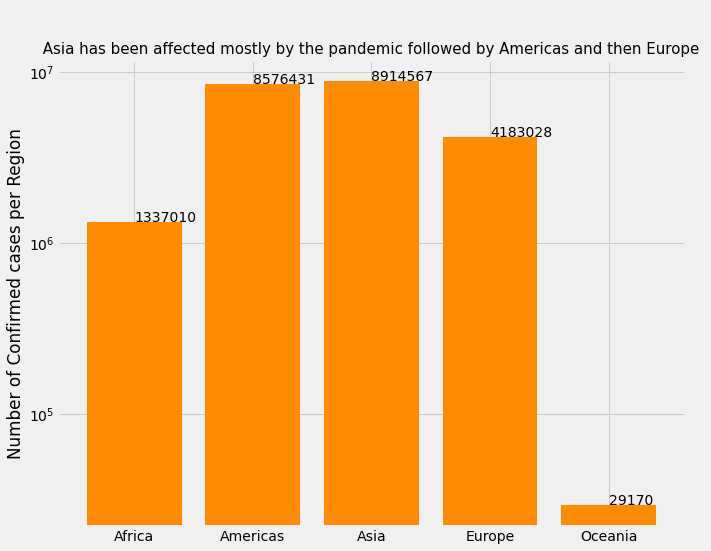

In [95]:
fig, ax = plt.subplots()
ax.bar(region_statistics.index, region_statistics['Confirmed Cases'] , color='darkorange')
ax.set_ylabel('Number of Confirmed cases per Region')
ax.set_title('\n\n Asia has been affected mostly by the pandemic followed by Americas and then Europe ', fontsize=15)
ax.set_yscale('log')
for index, value in enumerate(region_statistics['Confirmed Cases']):
    ax.text(index, value, str(value))
plt.show()
fig.savefig('cases Per region.jpg', dpi=300)

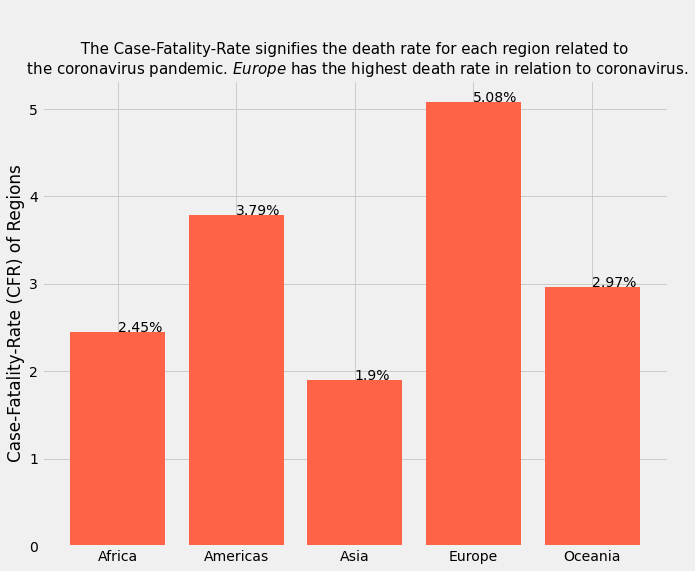

In [96]:
fig, ax = plt.subplots()
region_statistics['Case Fatality Rate'] = round(region_statistics['Confirmed Deaths'] / region_statistics['Confirmed Cases'] * 100, 2)
region_statistics['Recovery Rate'] = round(region_statistics['Recovered'] / region_statistics['Confirmed Cases'] * 100 , 2)
ax.bar(region_statistics.index, region_statistics['Case Fatality Rate'] , color='tomato')
ax.set_ylabel('Case-Fatality-Rate (CFR) of Regions')
ax.set_title('\n\n The Case-Fatality-Rate signifies the death rate for each region related to \n the coronavirus pandemic. $Europe$ has the highest death rate in relation to coronavirus.', fontsize=15)
#ax.set_yscale('log')
for index, value in enumerate(region_statistics['Case Fatality Rate']):
    ax.text(index, value, str(value) + '%')
#ax.legend()
#for i in ax.patches:
   # ax.text(i.get_x()+.12, i.get_height()-10, str(round((i.get_height()), 2)), fontsize=15, color='black')
#fig.set_size_inches([7, 5])
plt.show()
fig.savefig('Fatility rate Per region.jpg', dpi=300)

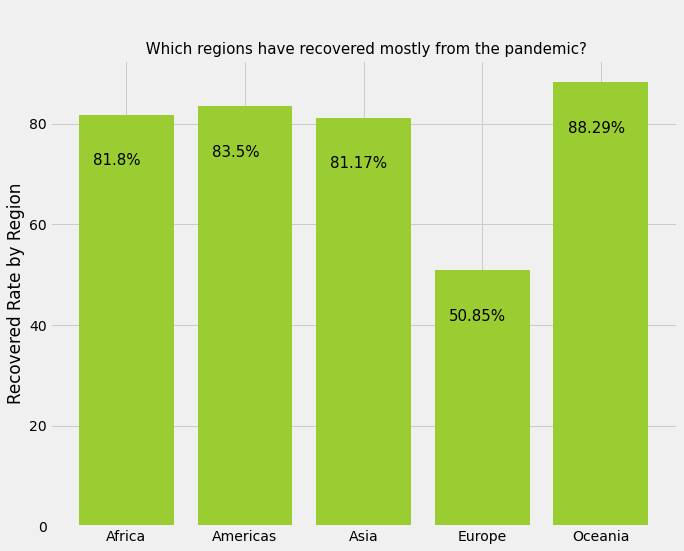

In [97]:
fig, ax = plt.subplots()
ax.bar(region_statistics.index, region_statistics['Recovery Rate'], color='yellowgreen')
ax.set_ylabel('Recovered Rate by Region')
ax.set_title('\n\n Which regions have recovered mostly from the pandemic?', fontsize=15)
#ax.set_yscale('log')
#ax.legend()
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-10, \
            str(round((i.get_height()), 2)) + '%', fontsize=15, color='black')
plt.show()
fig.savefig('Recovery rate per Region.png',dpi=300)

### Prevalence and Fatality rate for Top 30 countries in relation to coronavirus cases

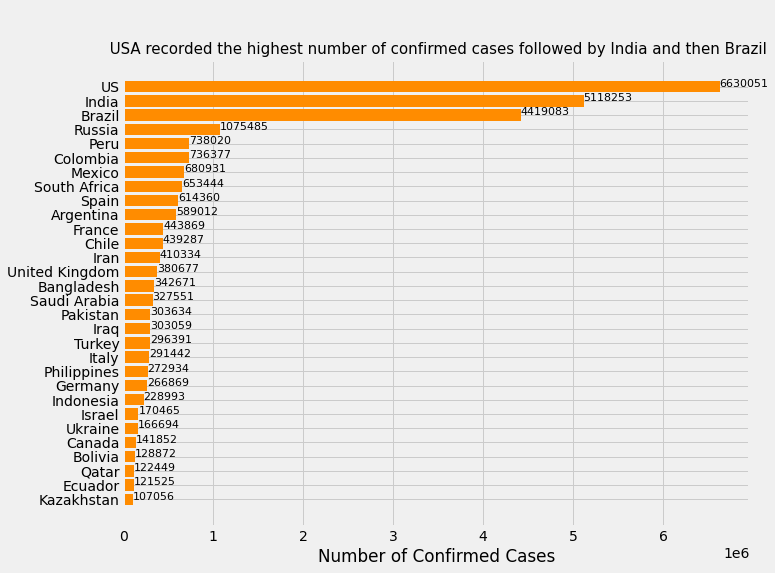

In [98]:
fig, ax = plt.subplots()
cases_population = global_df.loc[:,['Province','Confirmed Cases','Confirmed Deaths','Population']]
cases_population = cases_population.set_index('Province')
cases_population = cases_population.sort_values('Confirmed Cases', ascending=True)
cases_top30 = cases_population.tail(30)
ax.barh(cases_top30.index, cases_top30['Confirmed Cases'], color='darkorange')
for index, value in enumerate(cases_top30['Confirmed Cases']):
    ax.text(value, index, str(value), fontsize=11)
#ax.set_xscale('log')
ax.set_xlabel('Number of Confirmed Cases')
ax.set_title('\n\n USA recorded the highest number of confirmed cases followed by India and then Brazil' , fontsize=15)
plt.show()
fig.savefig('cases per country.png',dpi=300)

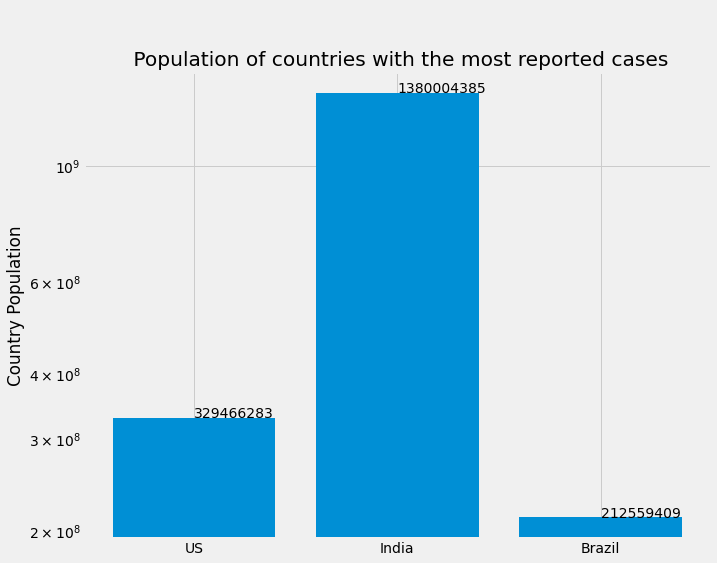

In [99]:
pop_df = global_df.set_index('Province')
pop_df = pop_df.loc[:,['Population','Confirmed Cases']]
pop_df = pop_df.sort_values('Confirmed Cases', ascending=False).head(3)
fig, ax = plt.subplots()
ax.bar(pop_df.index, pop_df['Population'])
ax.set_ylabel('Country Population')
ax.set_title('\n\n Population of countries with the most reported cases')
ax.set_yscale('log')
for index, value in enumerate(pop_df['Population']):
    ax.text(index, value, str(value))
plt.show()

No handles with labels found to put in legend.


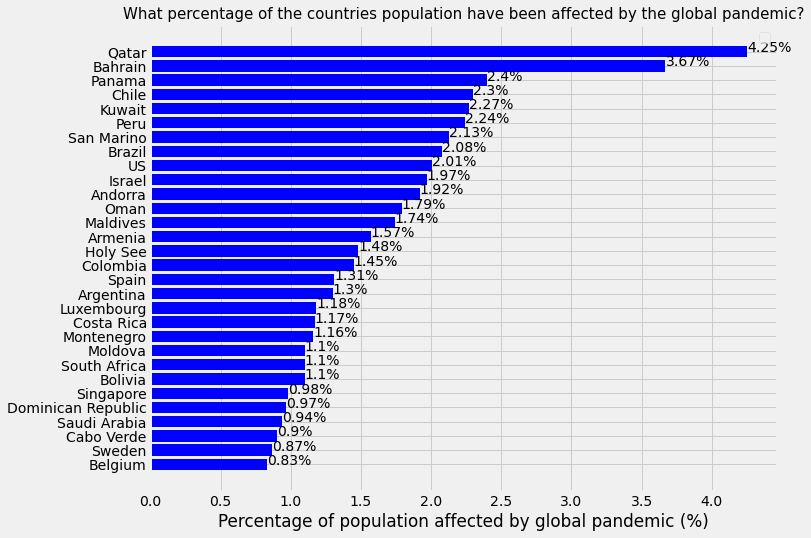

In [100]:
cases_population['Cases Population Rate'] = round (cases_population['Confirmed Cases'] / cases_population['Population'] *100, 2)
cases_population = cases_population.sort_values('Cases Population Rate', ascending=True)
cases_population.drop(['Diamond Princess','MS Zaandam'], axis=0, inplace=True)
cases_population.head()
fig, ax = plt.subplots()
cases_rate = cases_population.tail(30)
ax.barh(cases_rate.index, cases_rate['Cases Population Rate'], color='blue')
for index, value in enumerate(cases_rate['Cases Population Rate']):
    ax.text(value, index, str(value) +'%')
#ax.set_xscale('log')
ax.set_xlabel('Percentage of population affected by global pandemic (%)')
ax.set_title('What percentage of the countries population have been affected by the global pandemic?' , fontsize=15)
ax.legend()
plt.show()
fig.savefig('Population and cases.png',dpi=300)

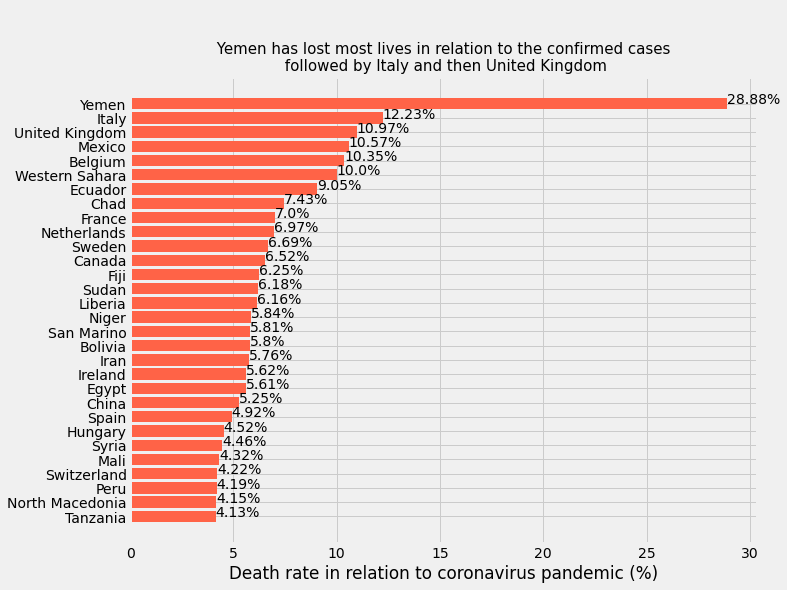

In [101]:
fig, ax = plt.subplots()
cases_population['Case-Fatality-Rate'] = round(cases_population['Confirmed Deaths'] / cases_population['Confirmed Cases'] *100, 2)
cases_population = cases_population.sort_values('Case-Fatality-Rate', ascending=True)
cases_rate = cases_population.tail(30)
ax.barh(cases_rate.index, cases_rate['Case-Fatality-Rate'], color='tomato')
for index, value in enumerate(cases_rate['Case-Fatality-Rate']):
    ax.text(value, index, str(value) +'%')
#ax.set_xscale('log')
ax.set_xlabel('Death rate in relation to coronavirus pandemic (%)')
ax.set_title('\n\n Yemen has lost most lives in relation to the confirmed cases \n followed by Italy and then United Kingdom' , fontsize=15)
plt.show()
fig.savefig('Death rate per country.png',dpi=300)

### Global maps showing the spread of coronavirus pandemic in countries of the world

In [102]:
import plotly.express as px
px.choropleth(global_df, locations='Code',hover_name='Province', title = 'Countries like USA and Brazil have surpassed China, where the pandemic originated from...', 
                   color='Confirmed Cases',labels={'Confirmed Cases':'Total Cases'},
                    color_continuous_scale=px.colors.sequential.Oranges) 

In [103]:
px.choropleth(global_df, locations='Code',hover_name='Province', title = 'Countries like USA, Brazil and India have reported many death cases globally in relation to the pandemic!!!', 
                   color='Confirmed Deaths',labels={'Confirmed Deaths':'Total Deaths'},
                    color_continuous_scale=px.colors.sequential.Reds) 

In [104]:
px.choropleth(map_data, locations='Code',hover_name='Province', title = 'The Global pandemic originated in China as indicated on the map', 
                   color='Confirmed Cases',labels={'Confirmed Cases':'Total Cases Confirmed'},
                    color_continuous_scale=px.colors.sequential.Oranges, animation_frame='Timeline') 

### Nigeria recorded cases and death rates per states

No handles with labels found to put in legend.


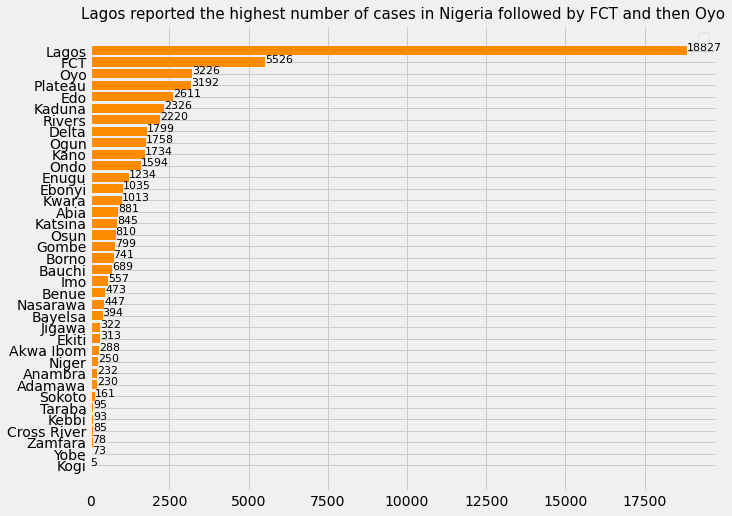

In [105]:
fig, ax = plt.subplots()
nigerian_sorted = nigerian_df.sort_values('Lab Cases', ascending=True)
ax.barh(nigerian_sorted.index, nigerian_sorted['Lab Cases'], color = 'darkorange')
for index, value in enumerate( nigerian_sorted['Lab Cases']):
    plt.text(value, index, str(value), fontsize=11)
#ax.set_xscale('log')
ax.set_title('Lagos reported the highest number of cases in Nigeria followed by FCT and then Oyo', fontsize=15)
ax.legend()
plt.show()
fig.savefig('Nigerian country data.png', dpi=300)

No handles with labels found to put in legend.


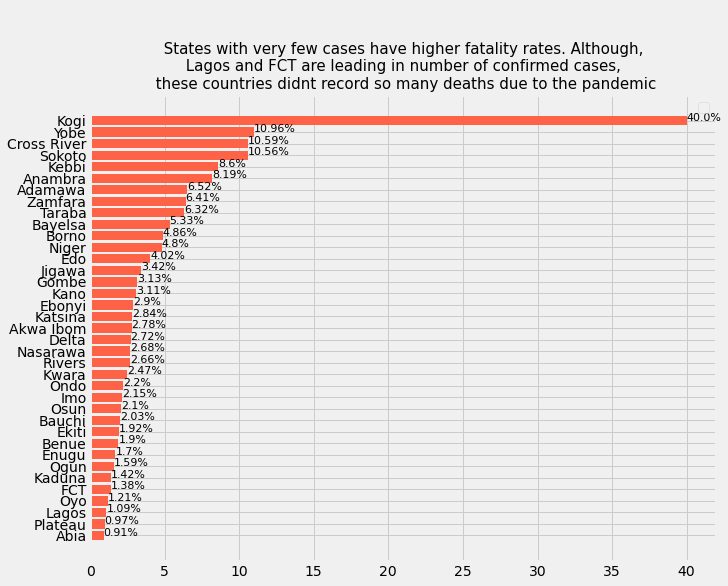

In [106]:
nigerian_df.head()
nigerian_df['Fatality Rate'] = round(nigerian_df['Deaths'] / nigerian_df['Lab Cases'] * 100, 2)
fig, ax = plt.subplots()
nigerian_sorted = nigerian_df.sort_values('Fatality Rate', ascending=True)
ax.barh(nigerian_sorted.index, nigerian_sorted['Fatality Rate'], color = 'tomato')
for index, value in enumerate( nigerian_sorted['Fatality Rate']):
    plt.text(value, index, str(value) +'%', fontsize=11)
#ax.set_xscale('log')
ax.set_title('\n\n States with very few cases have higher fatality rates. Although, \n Lagos and FCT are leading in number of confirmed cases, \n these countries didnt record so many deaths due to the pandemic', fontsize=15)
ax.legend()
plt.show()
fig.savefig('Nigerian country data.png', dpi=300)

### Monthly breakdown of the global pandemic

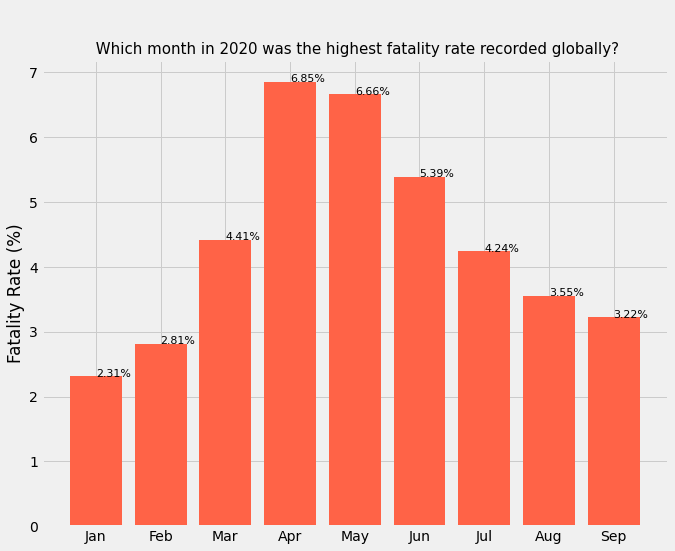

In [107]:
months = months_df.copy()
months['Fatality Rate'] = round(months['Confirmed Deaths'] / months['Confirmed Cases'] * 100, 2)
months
fig, ax = plt.subplots()
ax.bar(months.index, months['Fatality Rate'], color='tomato')
for index, value in enumerate(months['Fatality Rate']):
    plt.text(index, value, str(value) +'%', fontsize=11)
ax.set_ylabel('Fatality Rate (%)')
ax.set_title('\n\n Which month in 2020 was the highest fatality rate recorded globally?',fontsize=15)
plt.show()
fig.savefig('Fatality rate_months.png', dpi=300)

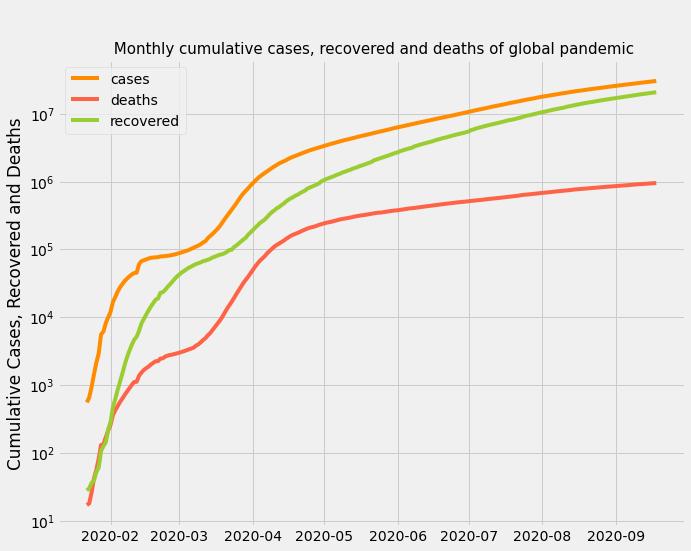

In [108]:
fig, ax = plt.subplots()
ax.plot(month_series.index, month_series['Confirmed Cases'], color='darkorange', label='cases')
ax.plot(month_series.index, month_series['Confirmed Deaths'], color='tomato', label='deaths')
ax.plot(month_series.index, month_series['Recovered'], color='yellowgreen', label='recovered')
ax.set_ylabel('Cumulative Cases, Recovered and Deaths')
ax.set_yscale('log')
ax.set_title('\n\n Monthly cumulative cases, recovered and deaths of global pandemic',fontsize=15)
ax.legend()
plt.show()
fig.savefig('monthlybreakdown_cases and deaths.png', dpi=300)

### Has the curve flattened for top reporting countries?

Text(0.5, 1.0, '\n\n China (origin of the global pandemic) that reported almost 10,000 confirmed cases by end of January flattened \n their curve from March to August and from August to September, the curve has declined \n. The country has reported less cases monthly in the month of September')

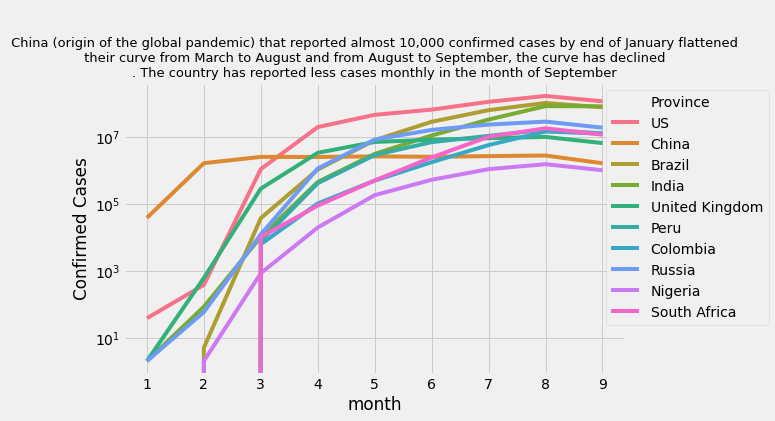

In [109]:
fig = plt.gcf()
fig.set_size_inches(8, 5)
line_plot = sns.lineplot(flattened_curve['month'], flattened_curve['Confirmed Cases'], hue=flattened_curve['Province'], data=flattened_curve)
line_plot.set_yscale('log')
line_plot.legend(loc='upper right', bbox_to_anchor=(1.3,1))
plt.title('\n\n China (origin of the global pandemic) that reported almost 10,000 confirmed cases by end of January flattened \n their curve from March to August and from August to September, the curve has declined \n. The country has reported less cases monthly in the month of September', fontsize=13)
